# Understanding Reasons for Homelessness in South Bay

### Import Data

In [13]:
import pandas as pd
import seaborn as sns
census = pd.read_excel('data/SantaClaraCountyHomelessCensus.xlsx', sheetname=0)
%pylab inline
reason_cols = [col for col in census.columns if 'F1' in col] + ['H1C', 'A3']
reasons = census[reason_cols]

Populating the interactive namespace from numpy and matplotlib


### Make column names readable

In [15]:
readable_cols = ['LostJob', 'Eviction', 'Foreclosure', 'Incarceration', 'AlcoholDrugUse', 
                'IllnessMedicalProblem', 'DivorceSeparation', 'LandlordRaisedRent', 'FamilyArgument',
                'FamilyDomesticViolence', 'MentalHealthIssues', 'Hospitalization', 'AgedOutOfFosterCare', 
                'ProbationRestrictions', 'Other', 'DontKnow', 'HasCondition', 'Gender']
reasons.columns = readable_cols

In [16]:
reasons['Trans'] = reasons['Gender'] > 2
reasons['Female'] = reasons['Gender'] == 2
for col in readable_cols:
    reasons.loc[reasons[col] == 1, col] = 1
    reasons.loc[reasons[col] != 1, col] = 0

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


## Crosstab relationship

##### If you have a mental condition, are you more likely to mark Abuse as a reason for homelessness?

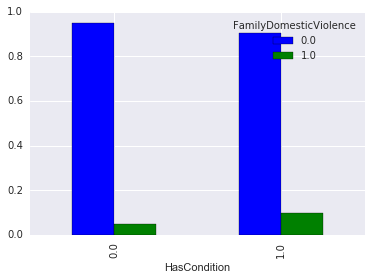

In [21]:
pd.crosstab(reasons['HasCondition'],
           reasons['FamilyDomesticViolence']).apply(lambda r: r/r.sum(), axis=1).plot(kind='bar')

##### Are females more likely to mark Abuse as a reason for homelessness?

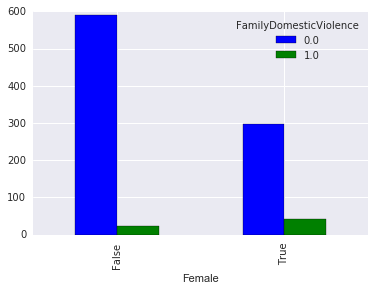

In [22]:
pd.crosstab(reasons['Female'],
            reasons['FamilyDomesticViolence']).plot(kind='bar')

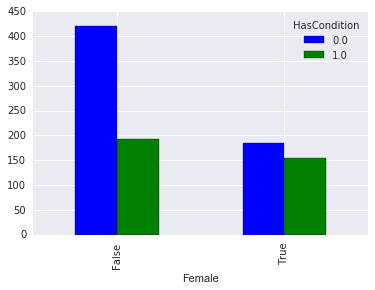

In [23]:
pd.crosstab(reasons['Female'],
            reasons['HasCondition']).plot(kind='bar')